# 3 Виконання

## 3.1 Для дослідження даних, візуалізуйте їх. Виведіть зображення перших 24 і 36 цифр з набору

### Для початку завантажимо набір даних digits за допомогою функції load_digits з модуля sklearn.datasets, що повертає ою'єкт Bunch, що містить дані цифр.

In [110]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

*Набір даних digits*

### Оскільки зображення - це двовімірний об'єкт, то вні володіє висотою та шириною у пікселях, то за дпомогою аотрибуту images виведемо матрицю для елементу з індексом 13. 

In [111]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

*Матриця двовимірного забраження*

### Алгоритми машинного навчання scikit-learn потребують, щоб зразки були збережені в двовимірному масиві значень з плаваючою точкою. Проте, ми маємо масив матриць чисел з плаваючою точкою, тобто тривимірний об'єкт. Однак функція load_digits повертає попередньо оброблені дані, які готові для машинного навчання. Набір даних Digits є числовим, тому load_digits просто перетворює двовимірний масив на одновимірний масив.

In [112]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

*Одновимірний масив зображення*

### Маємо, що перші вісім елементів - це елементи рядка з індексом 0, наступні вісім - з індексом 1 і так далі.

### Імпортуємо модуль matplotlib.pyplot та за допомогою методу imshow зобразимо перші 24 з 36 зображень. За допомогою методу ravel сплюснемо двовимірний масив осей до одновимірного та за допомогою zip одночасно ітеруємося як по осях, та і по картинках і їх назвах, тобто digits.target. Для зменшення padding'га між зображеннями застосуємо plt.tight_layout.

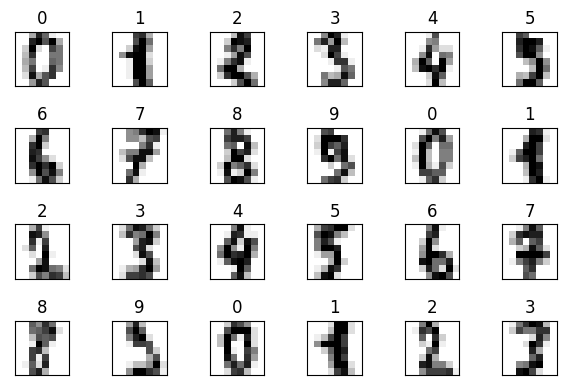

In [113]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

*Зображення перших 24 рисунків з масиву digits*

## 3.2 Розбийте дані на навчальні та тестові, за замовчуванням train_test_split резервує 75% даних для навчання і 25% для тестування, змініть це.

### Розіб'ємо дані на навчальні та тестові. Імпортуємо функцію train_test_split з sklearn.model_selection, що здійснює випадкову перестановку даних, а потім розбиває зразки в масиві data і цільові значення в масиві target на навчальний і тестовий набір. За замовчуванням функція розбиває тренувальні і тестові дані у співвіднощенні 75% до 25%.

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11)
print(X_train.shape)
print(X_test.shape)
print(X_train.shape[0] / digits.data.shape[0])
print(X_test.shape[0] / digits.data.shape[0])

(1347, 64)
(450, 64)
0.7495826377295493
0.25041736227045075


*Розбиття даних на тренувальні та тестові у відношенні 75% до 25%*

### Щоб змінити це співвідношення, потрібно задати розміри навчального і тестового набору за допомогою параметрів за замовчуванням test_size та train_size функції train_test_split. Задамо розмір test_size до 20%, а train_size вираховується автоматично.

In [115]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(X_train.shape[0] / digits.data.shape[0])
print(X_test.shape[0] / digits.data.shape[0])

(1437, 64)
(360, 64)
0.7996661101836394
0.2003338898163606


*Розбиття даних на тренувальні та тестові у відношенні 80% до 20%*

## 3.3 Створити та навчити модель

### Імпортуємо оцінювач KNeighborsClassifier з модуля sklearn.neighbors, який реалізує алгоритм K-Nearest Neighbors. Створимо екземпляр та вткличемо метод fit, передавши в нього X_train та y_train. k - відповідає за кількість сусідів, яких буде враховано під час класифікації. За замовчуванням їх п'ять.

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)
knn

KNeighborsClassifier()

*Тренування моделі K-Nearest Neighbors*

## 3.4 Виконайте прогнозування класів

### Викличемо метод fit в об'єкта knn, передавши в нього значення для пронозування, виведемо їх.

In [117]:
predicted = knn.predict(X=X_test)
expected = y_test
expected

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5, 3, 0, 5, 7, 3, 9, 6, 5,
       5, 8, 8, 1, 1, 2, 4, 9, 5, 6, 9, 2, 1, 8, 5, 3, 2, 7, 9, 6, 3, 7,
       4, 2, 0, 1, 0, 2, 7, 3, 5, 1, 8, 7, 7, 2, 0, 6, 6, 4, 6, 8, 3, 7,
       4, 1, 9, 3, 5, 4, 0, 3, 1, 3, 3, 1, 2, 8, 5, 0, 1, 7, 2, 1, 3, 3,
       7, 4, 0, 2, 9, 0, 4, 2, 5, 6, 1, 2, 6, 1, 8, 6, 0, 2, 6, 2, 6, 1,
       9, 4, 8, 0, 4, 0, 2, 3, 4, 4, 1, 7, 9, 7, 2, 0, 3, 7, 8, 8, 3, 5,
       4, 3, 5, 4, 9, 1, 3, 8, 8, 1, 1, 6, 7, 3, 3, 9, 9, 0, 6, 1, 0, 1,
       0, 7, 6, 1, 5, 9, 0, 2, 2, 8, 6, 8, 3, 2, 9, 2, 9, 3, 0, 1, 2, 7,
       4, 9, 9, 4, 9, 3, 2, 7, 2, 6, 9, 8, 0, 2, 6, 3, 4, 2, 7, 6, 6, 7,
       7, 6, 0, 7, 6, 6, 0, 7, 1, 4, 4, 1, 0, 9, 4, 0, 4, 2, 4, 6, 5, 3,
       8, 4, 1, 3, 9, 8, 3, 8, 9, 4, 2, 0, 4, 9, 2, 3, 5, 0, 8, 2, 5, 4,
       7, 5, 5, 1, 0, 2, 9, 0, 7, 7, 6, 2, 1, 5, 4, 1, 0, 5, 1, 6, 5, 4,
       8, 7, 5, 9, 0, 2, 2, 3, 4, 4, 8, 8, 8, 5, 3,

*Прогнозовані значення*

## 3.5 Порівняйте прогнозовані цифри з очікуваними для перших 20, 24, 36 тестових зразків

### Виведемо перші 20 елементів масивів predicted та expected. Бачимо, що тільки передостанній елемент неправильно пронозований: замість п'ятірки маємо трійку.

In [118]:
print(predicted[:20])
print(expected[:20])

[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 5 6]
[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6]


*Порівняння прогнозованих даних з очікуваними*

## 3.6 Поясніть результат, застосуйте метрики точності моделі

### Оскільки кожен оцінювач має метод score, то виведемо оцінку результатів.

In [119]:
print(f'{knn.score(X_test, y_test):.2%}')

98.61%


*Оцінка точності моделі*

### Виведемо інформацію про правильно і неправильно прогнозованих значеннях за допомогою матриці невідповідностей для заданого класу.

In [120]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 35]])

*Матриця невідповідностей*

## 3.7 Виведіть звіт класифікації

### За допомогою функції classification_report з модуля sklearn.metrics виведемо таблицю метрик класифікації, заснованих на очікуваних і пронозованих значеннях.

In [121]:
from sklearn.metrics import classification_report
names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted,
                            target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.95      0.97        41
           4       0.98      0.98      0.98        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      1.00      0.97        36
           8       0.97      1.00      0.99        34
           9       1.00      0.95      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



*Звіт класифікації*

## 3.8 Використайте декілька моделей KNeighborsClassifier, SVC і GaussianNB для пошуку найкращої

### Ініціалізуємо список results, у який будемо додавати результати моделей.

In [122]:
results = []

*Список результатів моделей*

### Імпортуємо клас GridSearch для знаходження оптимальних гіперпараметрів для кожної моделі.

In [123]:
from sklearn.model_selection import GridSearchCV

*Імпортування GridSearchCV*

### Імпортуємо SVC з модуля sklearn.svm. Ядрами для SVC будуть  "rbf", "linear". Задамо параметр C, який контролює трейд-офф між гладкістю вирішальної границі та правильною класифікацією точок. Де чим більше С, тим краще класифікуються точки. cv — генератор перехресної перевірки або ітерація, у цьому випадку є 10-кратна перехресна перевірка. n_jobs — максимальна кількість одночасно запущених воркерів; у цьому випадку встановлено значення -1, що означає, що використовуються всі ЦП.

In [124]:
from sklearn.svm import SVC
params = {'C': range(1, 20), 'kernel': ['rbf', 'linear']}
svc = SVC(gamma='auto', probability=True)
svc_model = GridSearchCV(svc, param_grid=params, cv=10, n_jobs=-1)
svc_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(gamma='auto', probability=True), n_jobs=-1,
             param_grid={'C': range(1, 20), 'kernel': ['rbf', 'linear']})

*Тренування моделі SVM*

### Покажемо оптимальні параметри моделі.

In [125]:
svc_model.get_params()['estimator__C']

1.0

*Оптимальний параметр C*

### Викличемо метод fit в об'єкта svc_model, передавши в нього значення для пронозування, виведемо їх.

In [126]:
predicted = svc_model.predict(X=X_test)
expected = y_test
expected

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5, 3, 0, 5, 7, 3, 9, 6, 5,
       5, 8, 8, 1, 1, 2, 4, 9, 5, 6, 9, 2, 1, 8, 5, 3, 2, 7, 9, 6, 3, 7,
       4, 2, 0, 1, 0, 2, 7, 3, 5, 1, 8, 7, 7, 2, 0, 6, 6, 4, 6, 8, 3, 7,
       4, 1, 9, 3, 5, 4, 0, 3, 1, 3, 3, 1, 2, 8, 5, 0, 1, 7, 2, 1, 3, 3,
       7, 4, 0, 2, 9, 0, 4, 2, 5, 6, 1, 2, 6, 1, 8, 6, 0, 2, 6, 2, 6, 1,
       9, 4, 8, 0, 4, 0, 2, 3, 4, 4, 1, 7, 9, 7, 2, 0, 3, 7, 8, 8, 3, 5,
       4, 3, 5, 4, 9, 1, 3, 8, 8, 1, 1, 6, 7, 3, 3, 9, 9, 0, 6, 1, 0, 1,
       0, 7, 6, 1, 5, 9, 0, 2, 2, 8, 6, 8, 3, 2, 9, 2, 9, 3, 0, 1, 2, 7,
       4, 9, 9, 4, 9, 3, 2, 7, 2, 6, 9, 8, 0, 2, 6, 3, 4, 2, 7, 6, 6, 7,
       7, 6, 0, 7, 6, 6, 0, 7, 1, 4, 4, 1, 0, 9, 4, 0, 4, 2, 4, 6, 5, 3,
       8, 4, 1, 3, 9, 8, 3, 8, 9, 4, 2, 0, 4, 9, 2, 3, 5, 0, 8, 2, 5, 4,
       7, 5, 5, 1, 0, 2, 9, 0, 7, 7, 6, 2, 1, 5, 4, 1, 0, 5, 1, 6, 5, 4,
       8, 7, 5, 9, 0, 2, 2, 3, 4, 4, 8, 8, 8, 5, 3,

*Прогнозовані значення моделі SVC*

### Визначимо точність моделі на тренувальних та тестових даних.

In [127]:
train_score = round(svc_model.score(X_train, y_train), 5)
test_score = round(svc_model.score(X_test, y_test), 5)
results.append({'method': 'svc', 'score': train_score, 'type': 'train'})
results.append({'method': 'svc', 'score': test_score, 'type': 'test'})
print(f'Train accuracy: {train_score}')
print(f'Test accuracy: {test_score}')

Train accuracy: 1.0
Test accuracy: 0.975


*Точність моделі SVC*

### Виведемо інформацію про правильно і неправильно прогнозованих значеннях за допомогою матриці невідповідностей для заданого класу.

In [128]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 32,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 36]])

*Матриця невідповідностей моделі SVC*

### Імпортуємо GaussianNB з модуля sklearn.svm. Налаштуємо гіперпараметр var_smoothing, який є обчисленням стабільності, щоб розширити (або згладити) криву і, отже, врахувати більше вибірок, які знаходяться далі від середнього розподілу. У цьому випадку np.logspace повертає числа, рівномірно розподілені в логарифмічній шкалі, починаючи з 0, закінчуючи -9, і генерує 100 зразків.

In [129]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
param_grid_nb = {'var_smoothing': np.logspace(0, -10, num=100)}
nbModel_grid = GridSearchCV(estimator=GaussianNB(),
                            param_grid=param_grid_nb,
                            cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 7.92482898e-01, 6.28029144e-01, 4.97702356e-01,
       3.94420606e-01, 3.12571585e-01, 2.47707636e-01, 1.96304065e-01,
       1.55567614e-01, 1.23284674e-01, 9.77009957e-02, 7.74263683e-02,
       6.13590727e-02, 4.86260158e-02, 3.85352859e-02, 3.05385551e-02,
       2.42012826e-02, 1.917910...
       2.10490414e-08, 1.66810054e-08, 1.32194115e-08, 1.04761575e-08,
       8.30217568e-09, 6.57933225e-09, 5.21400829e-09, 4.13201240e-09,
       3.27454916e-09, 2.59502421e-09, 2.05651231e-09, 1.62975083e-09,
       1.29154967e-09, 1.02353102e-09, 8.11130831e-10, 6.42807312e-10,
       5.09413801e-10, 4.03701726e-10, 3.19926714e-10, 2.53536449e-10,
       2.00923300e-10, 1.59228279e-10, 1.26185688e-10, 1.00000000e-10])})

*Тренування моделі GaussianNB*

### Покажемо оптимальні параметри моделі.

In [130]:
nbModel_grid.get_params()['estimator__var_smoothing']

1e-09

*Оптимальне значення параметру var_smoothing*

### Викличемо метод fit в об'єкта nbModel_grid, передавши в нього значення для пронозування, виведемо їх.

In [131]:
predicted = nbModel_grid.predict(X=X_test)
expected = y_test
expected

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5, 3, 0, 5, 7, 3, 9, 6, 5,
       5, 8, 8, 1, 1, 2, 4, 9, 5, 6, 9, 2, 1, 8, 5, 3, 2, 7, 9, 6, 3, 7,
       4, 2, 0, 1, 0, 2, 7, 3, 5, 1, 8, 7, 7, 2, 0, 6, 6, 4, 6, 8, 3, 7,
       4, 1, 9, 3, 5, 4, 0, 3, 1, 3, 3, 1, 2, 8, 5, 0, 1, 7, 2, 1, 3, 3,
       7, 4, 0, 2, 9, 0, 4, 2, 5, 6, 1, 2, 6, 1, 8, 6, 0, 2, 6, 2, 6, 1,
       9, 4, 8, 0, 4, 0, 2, 3, 4, 4, 1, 7, 9, 7, 2, 0, 3, 7, 8, 8, 3, 5,
       4, 3, 5, 4, 9, 1, 3, 8, 8, 1, 1, 6, 7, 3, 3, 9, 9, 0, 6, 1, 0, 1,
       0, 7, 6, 1, 5, 9, 0, 2, 2, 8, 6, 8, 3, 2, 9, 2, 9, 3, 0, 1, 2, 7,
       4, 9, 9, 4, 9, 3, 2, 7, 2, 6, 9, 8, 0, 2, 6, 3, 4, 2, 7, 6, 6, 7,
       7, 6, 0, 7, 6, 6, 0, 7, 1, 4, 4, 1, 0, 9, 4, 0, 4, 2, 4, 6, 5, 3,
       8, 4, 1, 3, 9, 8, 3, 8, 9, 4, 2, 0, 4, 9, 2, 3, 5, 0, 8, 2, 5, 4,
       7, 5, 5, 1, 0, 2, 9, 0, 7, 7, 6, 2, 1, 5, 4, 1, 0, 5, 1, 6, 5, 4,
       8, 7, 5, 9, 0, 2, 2, 3, 4, 4, 8, 8, 8, 5, 3,

*Прогнозовані значення моделі GaussianNB*

### Визначимо точність моделі на тренувальних та тестових даних.

In [132]:
train_score = round(nbModel_grid.score(X_train, y_train), 5)
test_score = round(nbModel_grid.score(X_test, y_test), 5)
results.append({'method': 'gaussian_nb', 'score': train_score, 'type': 'train'})
results.append({'method': 'gaussian_nb', 'score': test_score, 'type': 'test'})
print(f'Train accuracy: {grid_train_score}')
print(f'Test accuracy: {test_score}')

Train accuracy: 0.98956
Test accuracy: 0.91389


*Точність моделі GaussianNB*

### Виведемо інформацію про правильно і неправильно прогнозованих значеннях за допомогою матриці невідповідностей для заданого класу.

In [133]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 29,  1,  0,  0,  0,  0,  0,  4,  3],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 36,  0,  1,  0,  2,  2,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0, 26,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  1],
       [ 0,  3,  0,  0,  0,  1,  0,  1, 29,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  3,  2, 31]])

*Матриця невідповідностей моделі GaussianNB*

## 3.9 Налаштуйте гіперпараметр K в KNeighborsClassifier

### Цього разу налаштуємо гіперпараметри за допомогою Gridsearh та звичайного циклу. Нехай будемо мати відрізок від 1 до 99 включно та визначимо найкращі параметри та порівняємо результати, перебираючи кількість сусідів.

In [134]:
classificator = KNeighborsClassifier()
params = {'n_neighbors': range(1, 100)}
grid_search = GridSearchCV(classificator, params)
grid_search.fit(X_train, y_train)
knn_grid = grid_search.best_estimator_
knn_grid

KNeighborsClassifier(n_neighbors=4)

*Визначення найкращого параметра за допомогою GridSearchCV*

### Визначимо точність моделі на тренувальних та тестових даних

In [135]:
grid_train_score = round(knn_grid.score(X_train, y_train), 5)
grid_test_score = round(knn_grid.score(X_test, y_test), 5)
print(f'Train accuracy: {grid_train_score}')
print(f'Test accuracy: {grid_test_score}')

Train accuracy: 0.98956
Test accuracy: 0.98611


*Точність моделі K-Nearest Neighbors GridSearchCV*

### Натренуємо моделі в циклі та визначимо найкращу.

In [136]:
knn_train_scores = []
knn_test_scores = []
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_train_scores.append(round(knn.score(X_train, y_train), 5))
    knn_test_scores.append(round(knn.score(X_test, y_test), 5))
knn_scores = pd.DataFrame({
    'train': knn_train_scores,
    'test': knn_test_scores})
knn_scores

,train,test
0,1.00000,0.98611
1,0.99026,0.99444
2,0.99235,0.98889
3,0.98956,0.98611
4,0.98817,0.98611
...,...,...
94,0.92345,0.91389
95,0.92276,0.91667
96,0.92067,0.91667
97,0.91928,0.91667


*Визначення найкращого параметра за допомогою циклу*

### Визначимо найращий параметр для KNN у циклі.

In [137]:
k = knn_scores.test.idxmax()
test_score = knn_scores.test[k]
train_score = knn_scores.train[k]
print(f'Cycle K: {k+1}')
print(f'Cycle test score: {test_score}')
print(f'Cycle train score: {train_score}')

Cycle K: 2
Cycle test score: 0.99444
Cycle train score: 0.99026


*Точність моделі K-Nearest Neighbors у циклі*

### Бачимо, що GridSearch дуже близько підібрався до оптимального параметра. У циклі модель виявилася точнішою і k = 2 із тестовою точністю в 0.99444, де gridSearch показав, що найкращим є k = 4 із тестовою точністю в 0.98611. Додамо knn з циклу у список results.

In [138]:
results.append({'method': 'knn', 'score': train_score, 'type': 'train'})
results.append({'method': 'knn', 'score': test_score, 'type': 'test'})

*Додавання найкращого результату KNN до результатів*

### Подивимося залежність точності KNN від параметру k у викгляді гістограми.

<AxesSubplot: ylabel='test'>

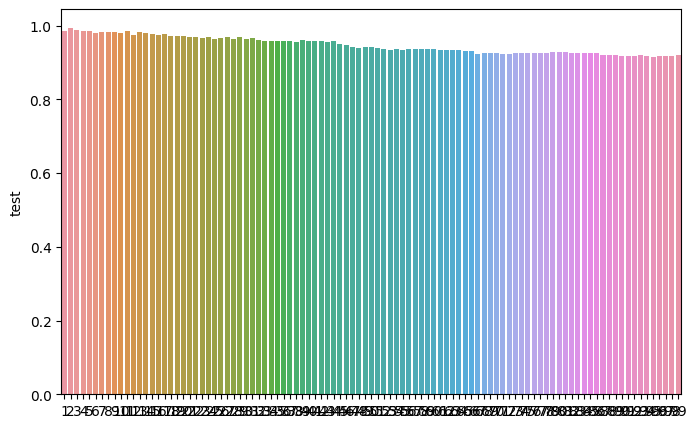

In [139]:
import seaborn as sns
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
indexes = [i for i in range(1, 100)]
sns.barplot(x=indexes, y=knn_scores.test)


*Зображення залежності точності KNN від значення k*

### Бачимо, що зі збільшенням k точність спадає. 

## 3.10 Порівняння результатів моделей KNN, GaussianNB, SVC

### Порівняємо отримані результати моделей. Утворимо датафрейм результатів.

In [140]:
df_score = pd.DataFrame(results, columns=['method','score','type'])
df_score

,method,score,type
0,svc,1.00000,train
1,svc,0.97500,test
2,gaussian_nb,0.93319,train
3,gaussian_nb,0.91389,test
4,knn,0.99026,train
5,knn,0.99444,test


*Датафрейм результатів*

### Для наочності побудуємо гістограму.

<AxesSubplot: xlabel='method', ylabel='score'>

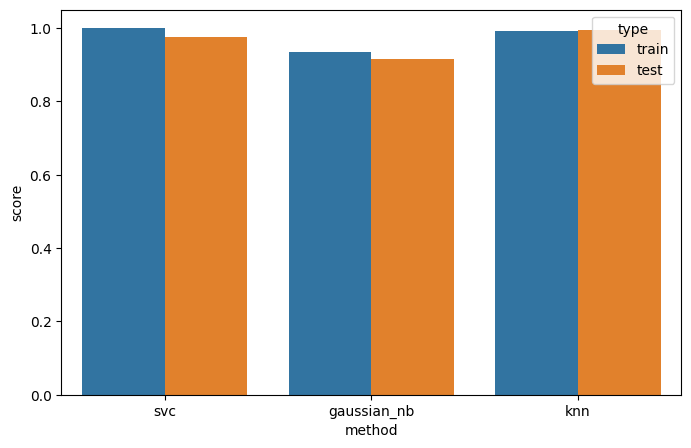

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.barplot(x='method', y='score', hue='type', data=df_score, ax=ax)

*Результати моделей*

### З огляду бачимо, що як на тренувальних, так і на тестових найгірше себе показав GaussianNB. Краще за нього відпрацював SVC. Однак з-поміж них усіх найкраще спрогнозував результати KNN.